In [1]:
from ete3 import PhyloTree, Tree, NCBITaxa, TreeStyle, AttrFace
ncbi = NCBITaxa()

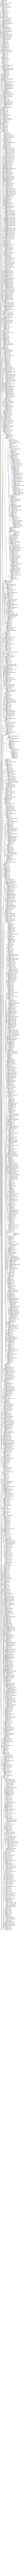

In [45]:
#COG465_combined = PhyloTree("../HorizontalGeneTransferAnalysis/COG465_combined.nwk", format=1, sp_naming_function=lambda name: ncbi.get_taxid_translator([ncbi.get_lineage(name.split('.')[0])[3]]))
COG465_combined = PhyloTree("../HorizontalGeneTransferAnalysis/COG465_combined.nwk", format=1, sp_naming_function=lambda name: ncbi.get_lineage(name.split('.')[0])[3])


def my_layout(node):
#    if getattr(node, "rank", None):
#        rank_face = AttrFace("species", fsize=7, fgcolor="indianred")
#        node.add_face(rank_face, column=0, position="branch-top")
    if node.is_leaf():
        sciname_face = AttrFace("species", fsize=9, fgcolor="steelblue")
        node.add_face(sciname_face, column=0, position="branch-right")
ts = TreeStyle()
ts.layout_fn = my_layout
ts.show_leaf_name = True

COG465_combined.render("%%inline", tree_style=ts)

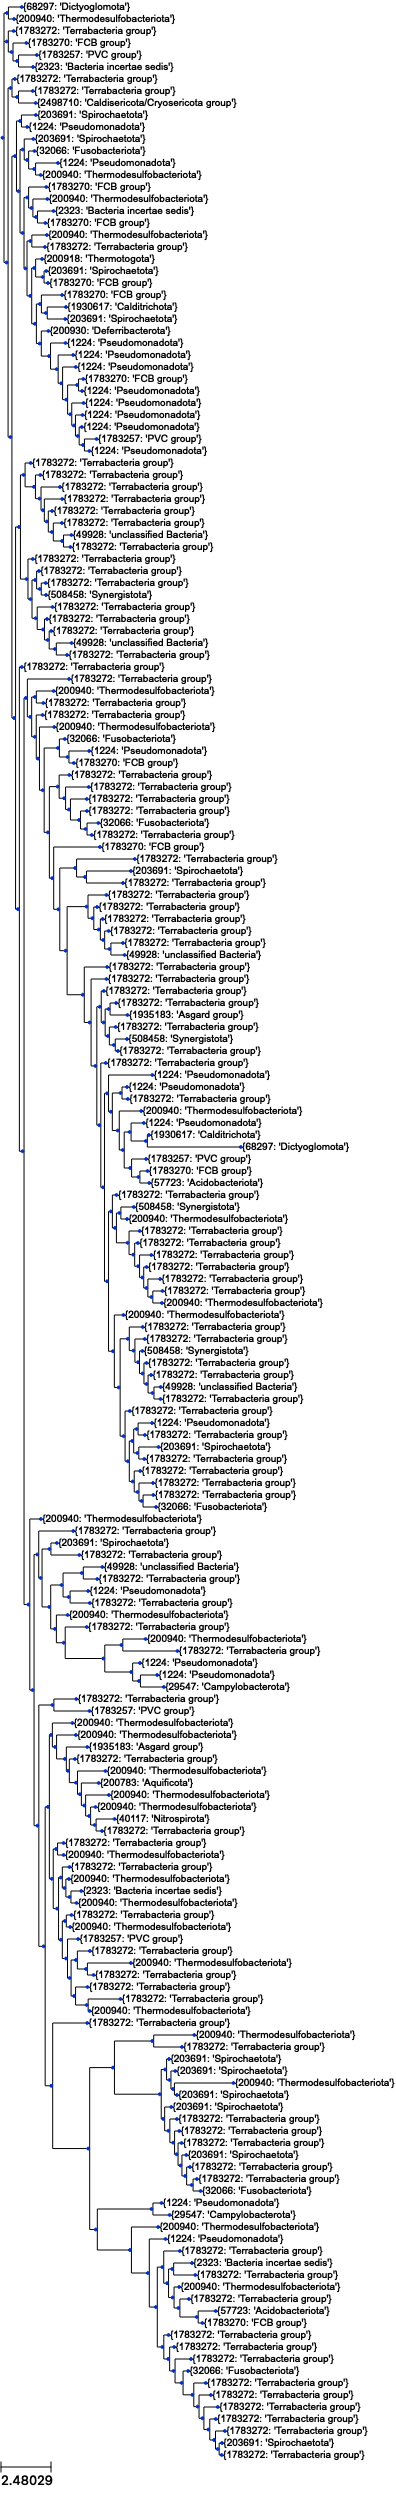

In [72]:
COG4656_Species = PhyloTree("../HorizontalGeneTransferAnalysis/COG4656_combined.nwk", format=1)#, sp_naming_function=lambda name: ncbi.get_lineage(name.split('.')[0])[3])

for lf in COG4656_Species.iter_leaves():
    lf.name = ncbi.get_lineage(lf.name.split('.')[0])[3]

def collapsed_leaf(node):
    if len(node2labels[node]) == 1:
        return True
    else:
        return False

def name_internal_nodes(T):
    for node in T.traverse():
        if node.is_leaf()==False:
            # list names of leaves
            leaf_names=[leaf.name for leaf in node.iter_leaves()]
            names_unique = list(set(leaf_names))
            # if all leaves have the same name, give that name to the node
            if (len(names_unique)==1):
                node.name = names_unique[0]

name_internal_nodes(COG4656_Species)

# Cache node content
node2labels = COG4656_Species.get_cached_content(store_attr="name")
# Collapse tree
t2 = Tree(COG4656_Species.write(is_leaf_fn=collapsed_leaf, quoted_node_names=True), quoted_node_names=True)

for lf in t2.iter_leaves():
    lf.name = ncbi.get_taxid_translator([lf.name])

t2.ladderize()
t2.render("%%inline")

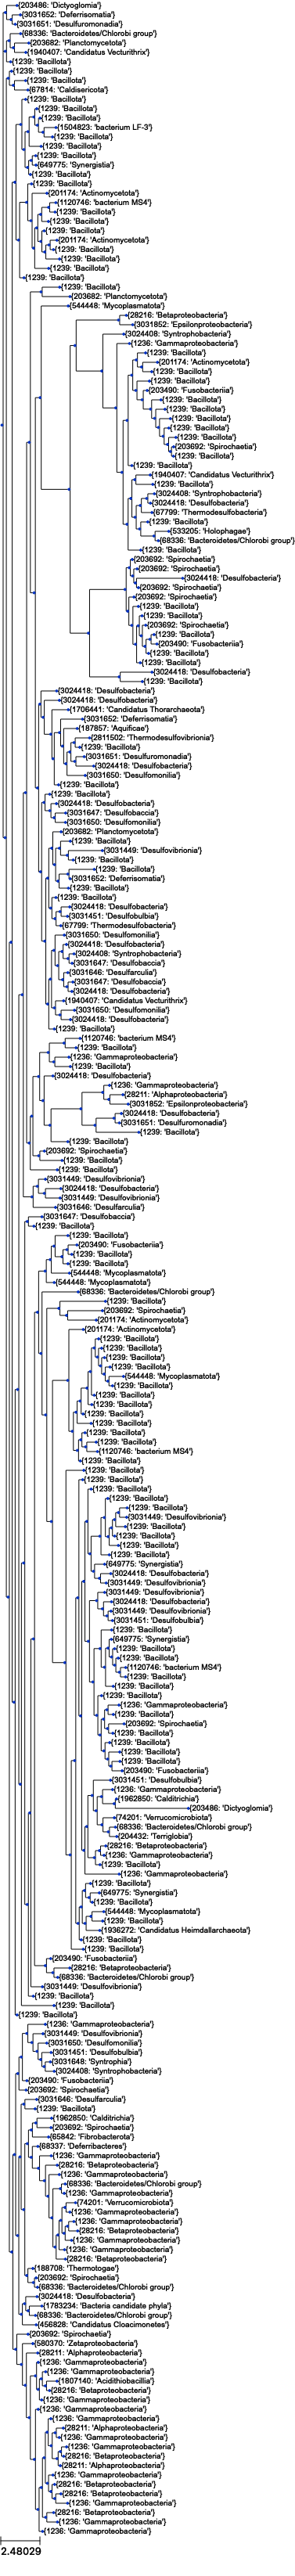

In [73]:
COG4656_Species = PhyloTree("../HorizontalGeneTransferAnalysis/COG4656_combined.nwk", format=1)#, sp_naming_function=lambda name: ncbi.get_lineage(name.split('.')[0])[3])

for lf in COG4656_Species.iter_leaves():
    lf.name = ncbi.get_lineage(lf.name.split('.')[0])[4]

def collapsed_leaf(node):
    if len(node2labels[node]) == 1:
        return True
    else:
        return False

def name_internal_nodes(T):
    for node in T.traverse():
        if node.is_leaf()==False:
            # list names of leaves
            leaf_names=[leaf.name for leaf in node.iter_leaves()]
            names_unique = list(set(leaf_names))
            # if all leaves have the same name, give that name to the node
            if (len(names_unique)==1):
                node.name = names_unique[0]

name_internal_nodes(COG4656_Species)

# Cache node content
node2labels = COG4656_Species.get_cached_content(store_attr="name")
# Collapse tree
t2 = Tree(COG4656_Species.write(is_leaf_fn=collapsed_leaf, quoted_node_names=True), quoted_node_names=True)

for lf in t2.iter_leaves():
    lf.name = ncbi.get_taxid_translator([lf.name])
    
t2.render("%%inline")